In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
import os 
os.getcwd()

'C:\\Users\\Juddy'

Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [2]:
rf = pd.read_csv(r"S:\Python IL\trainRF.csv")

AIM:
In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc 
we are predicting Price range of the mobile

In [3]:
rf.shape

(2000, 21)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
rf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
rf.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

From above outupt we find there are no null values and 2 features are of float datatypes and rest int data types .

We see that features datatypes are represented correct.

Shape of dataframe is (2000, 21)

In [8]:
rf.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# Checking nulls
rf.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As already mentioned there are no nulls



**DATA VISUALIZATION**

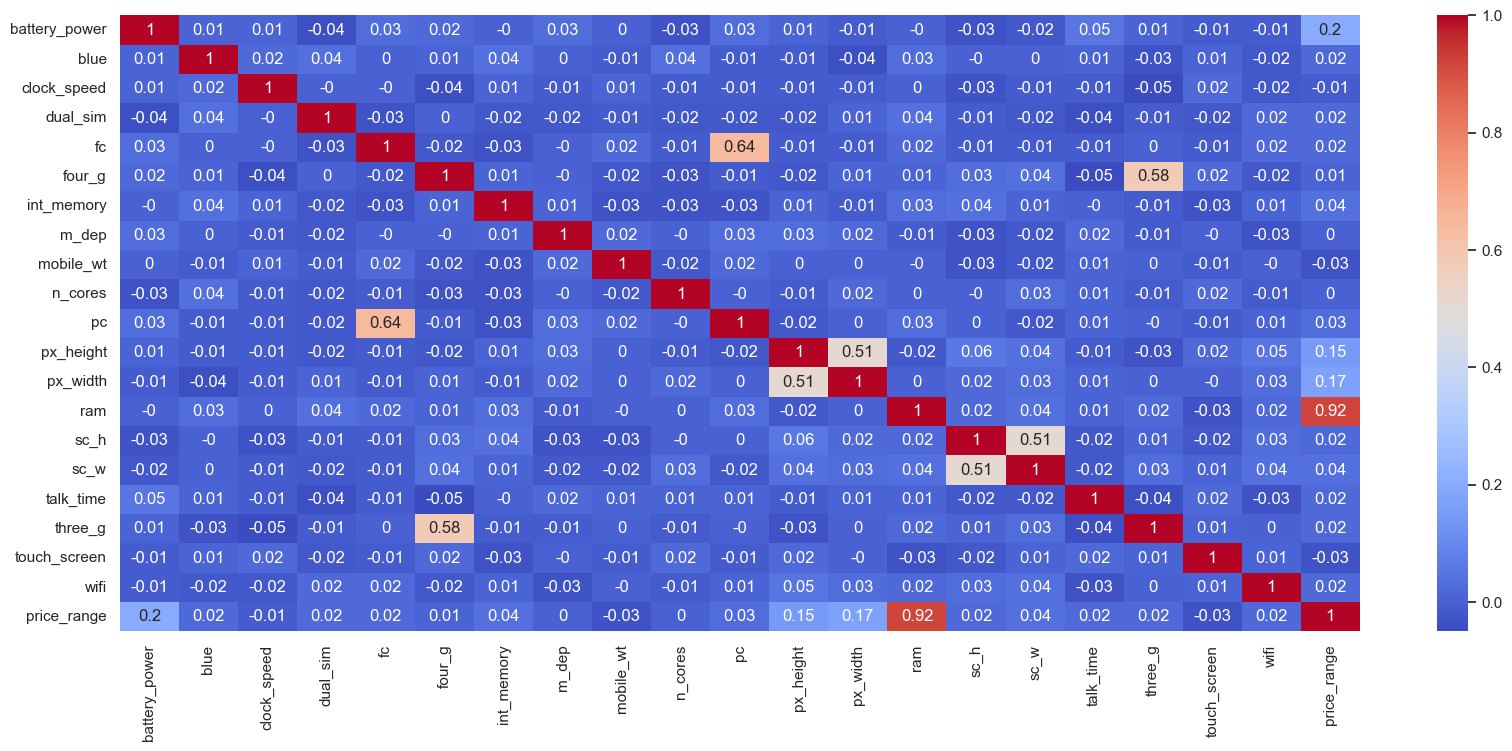

In [10]:
plt.figure(figsize = (20 , 8 ) ) 
sns.heatmap(rf.corr().round(2) , annot = True , cmap = "coolwarm")
plt.show() 

From this Correlation Matrix analysis we can see the following things :-

    - There is highest positive correlation between price_range and ram i.e 0.92 .
    
    - There exists no Correlation between price_range and (m_dep and n_cores ) .
    
    -  battery_power , px_height , px_width   are some of the significant features affecting the price_range.

###### How does ram is affected by price


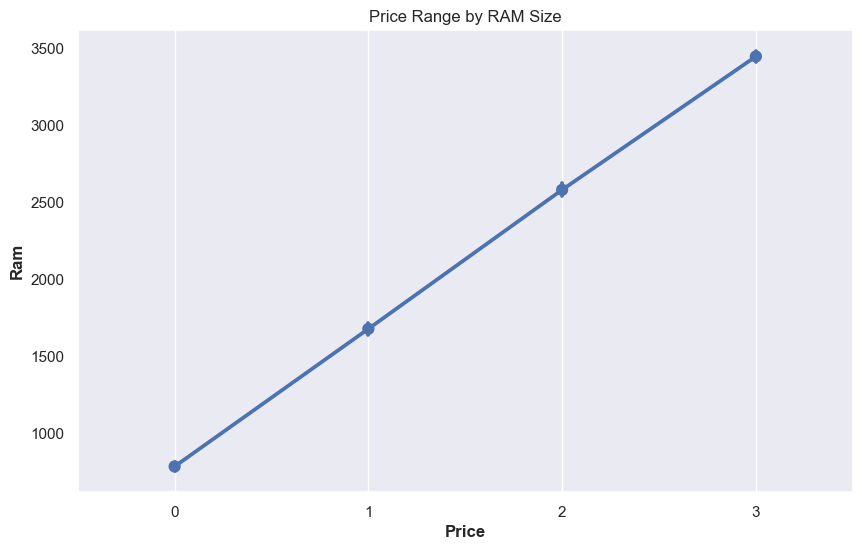

In [11]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='price_range', y='ram', data=rf )

# Add title and labels
plt.title('Price Range by RAM Size')
plt.xlabel('Price' , fontweight = "bold")
plt.ylabel('Ram' , fontweight = "bold")
plt.grid()

# Show the plot
plt.show()

From this graph we can see that as the Ram for the Phone is increasing , Price for the phone is also increasing

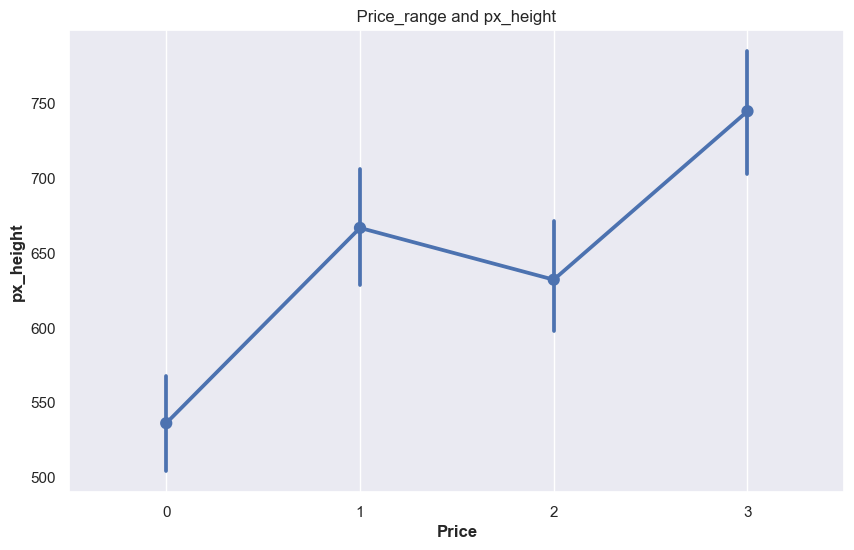

In [12]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='price_range', y='px_height', data=rf )

# Add title and labels
plt.title(' Price_range and px_height ')
plt.xlabel('Price' , fontweight = "bold")
plt.ylabel('px_height' , fontweight = "bold")
plt.grid()

# Show the plot
plt.show()

In [13]:
rf.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


<Axes: xlabel='price_range', ylabel='battery_power'>

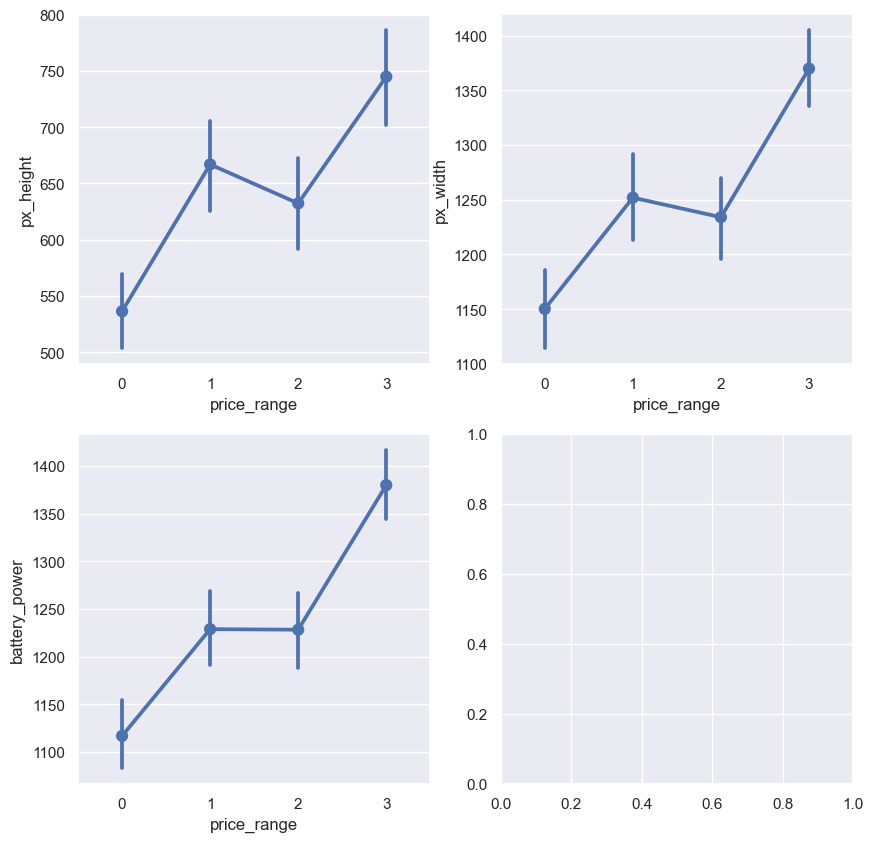

In [14]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.pointplot(x='price_range', y='px_height', data=rf , ax=axarr[0,0]   )
sns.pointplot(x='price_range', y='px_width', data=rf ,  ax=axarr[0,1]   )
sns.pointplot(x='price_range', y='battery_power', data=rf ,  ax=axarr[1,0] )

We have already seen from the correlation matrix that px_height , px_width , battery_power and price_range are correlated and from this graph also we can conclude that lower the px_height , price for the mobile will also be less and vice - versa.

### AIM IS TO BUILD PREDICITIVE MODEL TO PREDICT THE MOBILE PRICE(LOQ,MED,HIGH,VERYHIGH)

#### LOGISTIC REGRESSION

In [18]:
from sklearn.model_selection import train_test_split

rf_train , rf_test = train_test_split(rf , test_size = .2 , random_state=2911)

rf_train_x = rf_train.iloc[: , 0:-1]
rf_train_y = rf_train.iloc[: , -1]

rf_test_x = rf_test.iloc[: , 0:-1]
rf_test_y = rf_test.iloc[: , -1]

In [19]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(rf_train_x , rf_train_y); 

In [20]:
pred_test = Logreg.predict(rf_test_x)
pred_test

array([3, 2, 3, 1, 1, 3, 0, 3, 0, 2, 3, 2, 3, 3, 2, 1, 0, 0, 2, 1, 3, 1,
       3, 3, 2, 3, 0, 0, 0, 0, 0, 1, 1, 3, 3, 2, 0, 3, 3, 3, 3, 0, 1, 2,
       3, 0, 3, 0, 0, 3, 3, 3, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 3, 3, 0,
       0, 1, 0, 1, 3, 3, 3, 1, 3, 1, 3, 3, 2, 1, 0, 3, 1, 2, 0, 1, 3, 2,
       3, 3, 3, 1, 2, 0, 2, 3, 2, 0, 0, 0, 3, 0, 0, 3, 1, 1, 2, 0, 1, 2,
       1, 1, 3, 2, 3, 2, 2, 2, 2, 3, 0, 3, 1, 2, 2, 0, 2, 1, 2, 0, 0, 3,
       3, 0, 2, 0, 2, 1, 1, 2, 3, 1, 3, 0, 0, 3, 3, 1, 2, 3, 2, 1, 2, 0,
       0, 1, 2, 0, 0, 2, 0, 3, 3, 0, 0, 2, 3, 3, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 2, 1, 3, 0, 1, 3, 1, 1, 2, 1, 3, 3, 3, 3, 1, 0, 0, 3, 1, 1,
       0, 3, 3, 0, 1, 3, 1, 1, 3, 0, 2, 3, 1, 3, 3, 0, 1, 0, 2, 1, 1, 2,
       3, 2, 0, 0, 0, 3, 1, 2, 3, 2, 1, 2, 3, 0, 2, 2, 3, 0, 1, 1, 3, 3,
       3, 0, 2, 3, 2, 0, 3, 0, 0, 2, 3, 1, 3, 0, 1, 2, 3, 0, 3, 1, 0, 2,
       3, 0, 3, 3, 2, 0, 1, 0, 3, 0, 1, 1, 3, 0, 3, 1, 2, 2, 0, 1, 3, 1,
       3, 2, 1, 0, 0, 1, 2, 3, 2, 1, 0, 3, 1, 0, 3,

In [21]:
pred_train = Logreg.predict(rf_train_x)
pred_train

array([2, 2, 2, ..., 2, 1, 3], dtype=int64)

In [22]:
from sklearn.metrics import * 

In [23]:
tab = confusion_matrix(rf_test_y , pred_test)
tab

array([[85, 16,  0,  0],
       [21, 59, 21,  3],
       [ 0, 12, 40, 34],
       [ 0,  2, 19, 88]], dtype=int64)

In [24]:
print(classification_report(rf_test_y , pred_test)) # all need to focus on 1 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       101
           1       0.66      0.57      0.61       104
           2       0.50      0.47      0.48        86
           3       0.70      0.81      0.75       109

    accuracy                           0.68       400
   macro avg       0.67      0.67      0.67       400
weighted avg       0.67      0.68      0.67       400



#### DECISION TREE

In [25]:
from sklearn.model_selection import train_test_split

rf_train , rf_test = train_test_split(rf , test_size = .2 , random_state=2911)

rf_train_x = rf_train.iloc[: , 0:-1]
rf_train_y = rf_train.iloc[: , -1]

rf_test_x = rf_test.iloc[: , 0:-1]
rf_test_y = rf_test.iloc[: , -1]

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(rf_train_x , rf_train_y)

DecisionTreeClassifier()

In [27]:
pred_test_rf = dt.predict(rf_test_x)

In [28]:
from sklearn.metrics import * 

In [29]:
tab_rf = confusion_matrix(rf_test_y , pred_test_rf)
tab_rf

array([[94,  7,  0,  0],
       [12, 83,  9,  0],
       [ 0,  6, 70, 10],
       [ 0,  0, 19, 90]], dtype=int64)

In [30]:
print(classification_report(rf_test_y , pred_test_rf))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       101
           1       0.86      0.80      0.83       104
           2       0.71      0.81      0.76        86
           3       0.90      0.83      0.86       109

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



In [31]:
tab_rf = pd.DataFrame(tab_rf)
tab_rf

,0,1,2,3
0,94,7,0,0
1,12,83,9,0
2,0,6,70,10
3,0,0,19,90


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
search_dict = {"criterion" : ["gini" , "entropy"] , "max_depth" : range(5,10) , "min_samples_split" : range(25,50)}

In [35]:
grid = GridSearchCV(dt , param_grid = search_dict)
# grid = GridSearchCV(dt , param_grid = search_dict , verbose = 2) - unnecessary info it will generate by
#showimg every possible combination

In [36]:
grid.fit(rf_train_x , rf_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'min_samples_split': range(25, 50)})

In [37]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 47}

In [38]:
pred_test_grid_rf = grid.predict(rf_test_x)

In [39]:
from sklearn.metrics import *

In [40]:
cnrf = confusion_matrix(rf_test_y , pred_test_grid_rf )
cnrf

array([[94,  7,  0,  0],
       [12, 86,  6,  0],
       [ 0,  5, 71, 10],
       [ 0,  0, 13, 96]], dtype=int64)

In [41]:
tab_rf_grid  = pd.DataFrame(cnrf)
tab_rf_grid.columns = ["low" , "med" , "high" , "very high"]
tab_rf_grid.index = ["low" , "med" , "high" , "very high"]
tab_rf_grid

,low,med,high,very high
low,94,7,0,0
med,12,86,6,0
high,0,5,71,10
very high,0,0,13,96


In [42]:
print(classification_report(rf_test_y , pred_test_grid_rf ))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       101
           1       0.88      0.83      0.85       104
           2       0.79      0.83      0.81        86
           3       0.91      0.88      0.89       109

    accuracy                           0.87       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.87      0.87      0.87       400



In [43]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from graphviz import Source

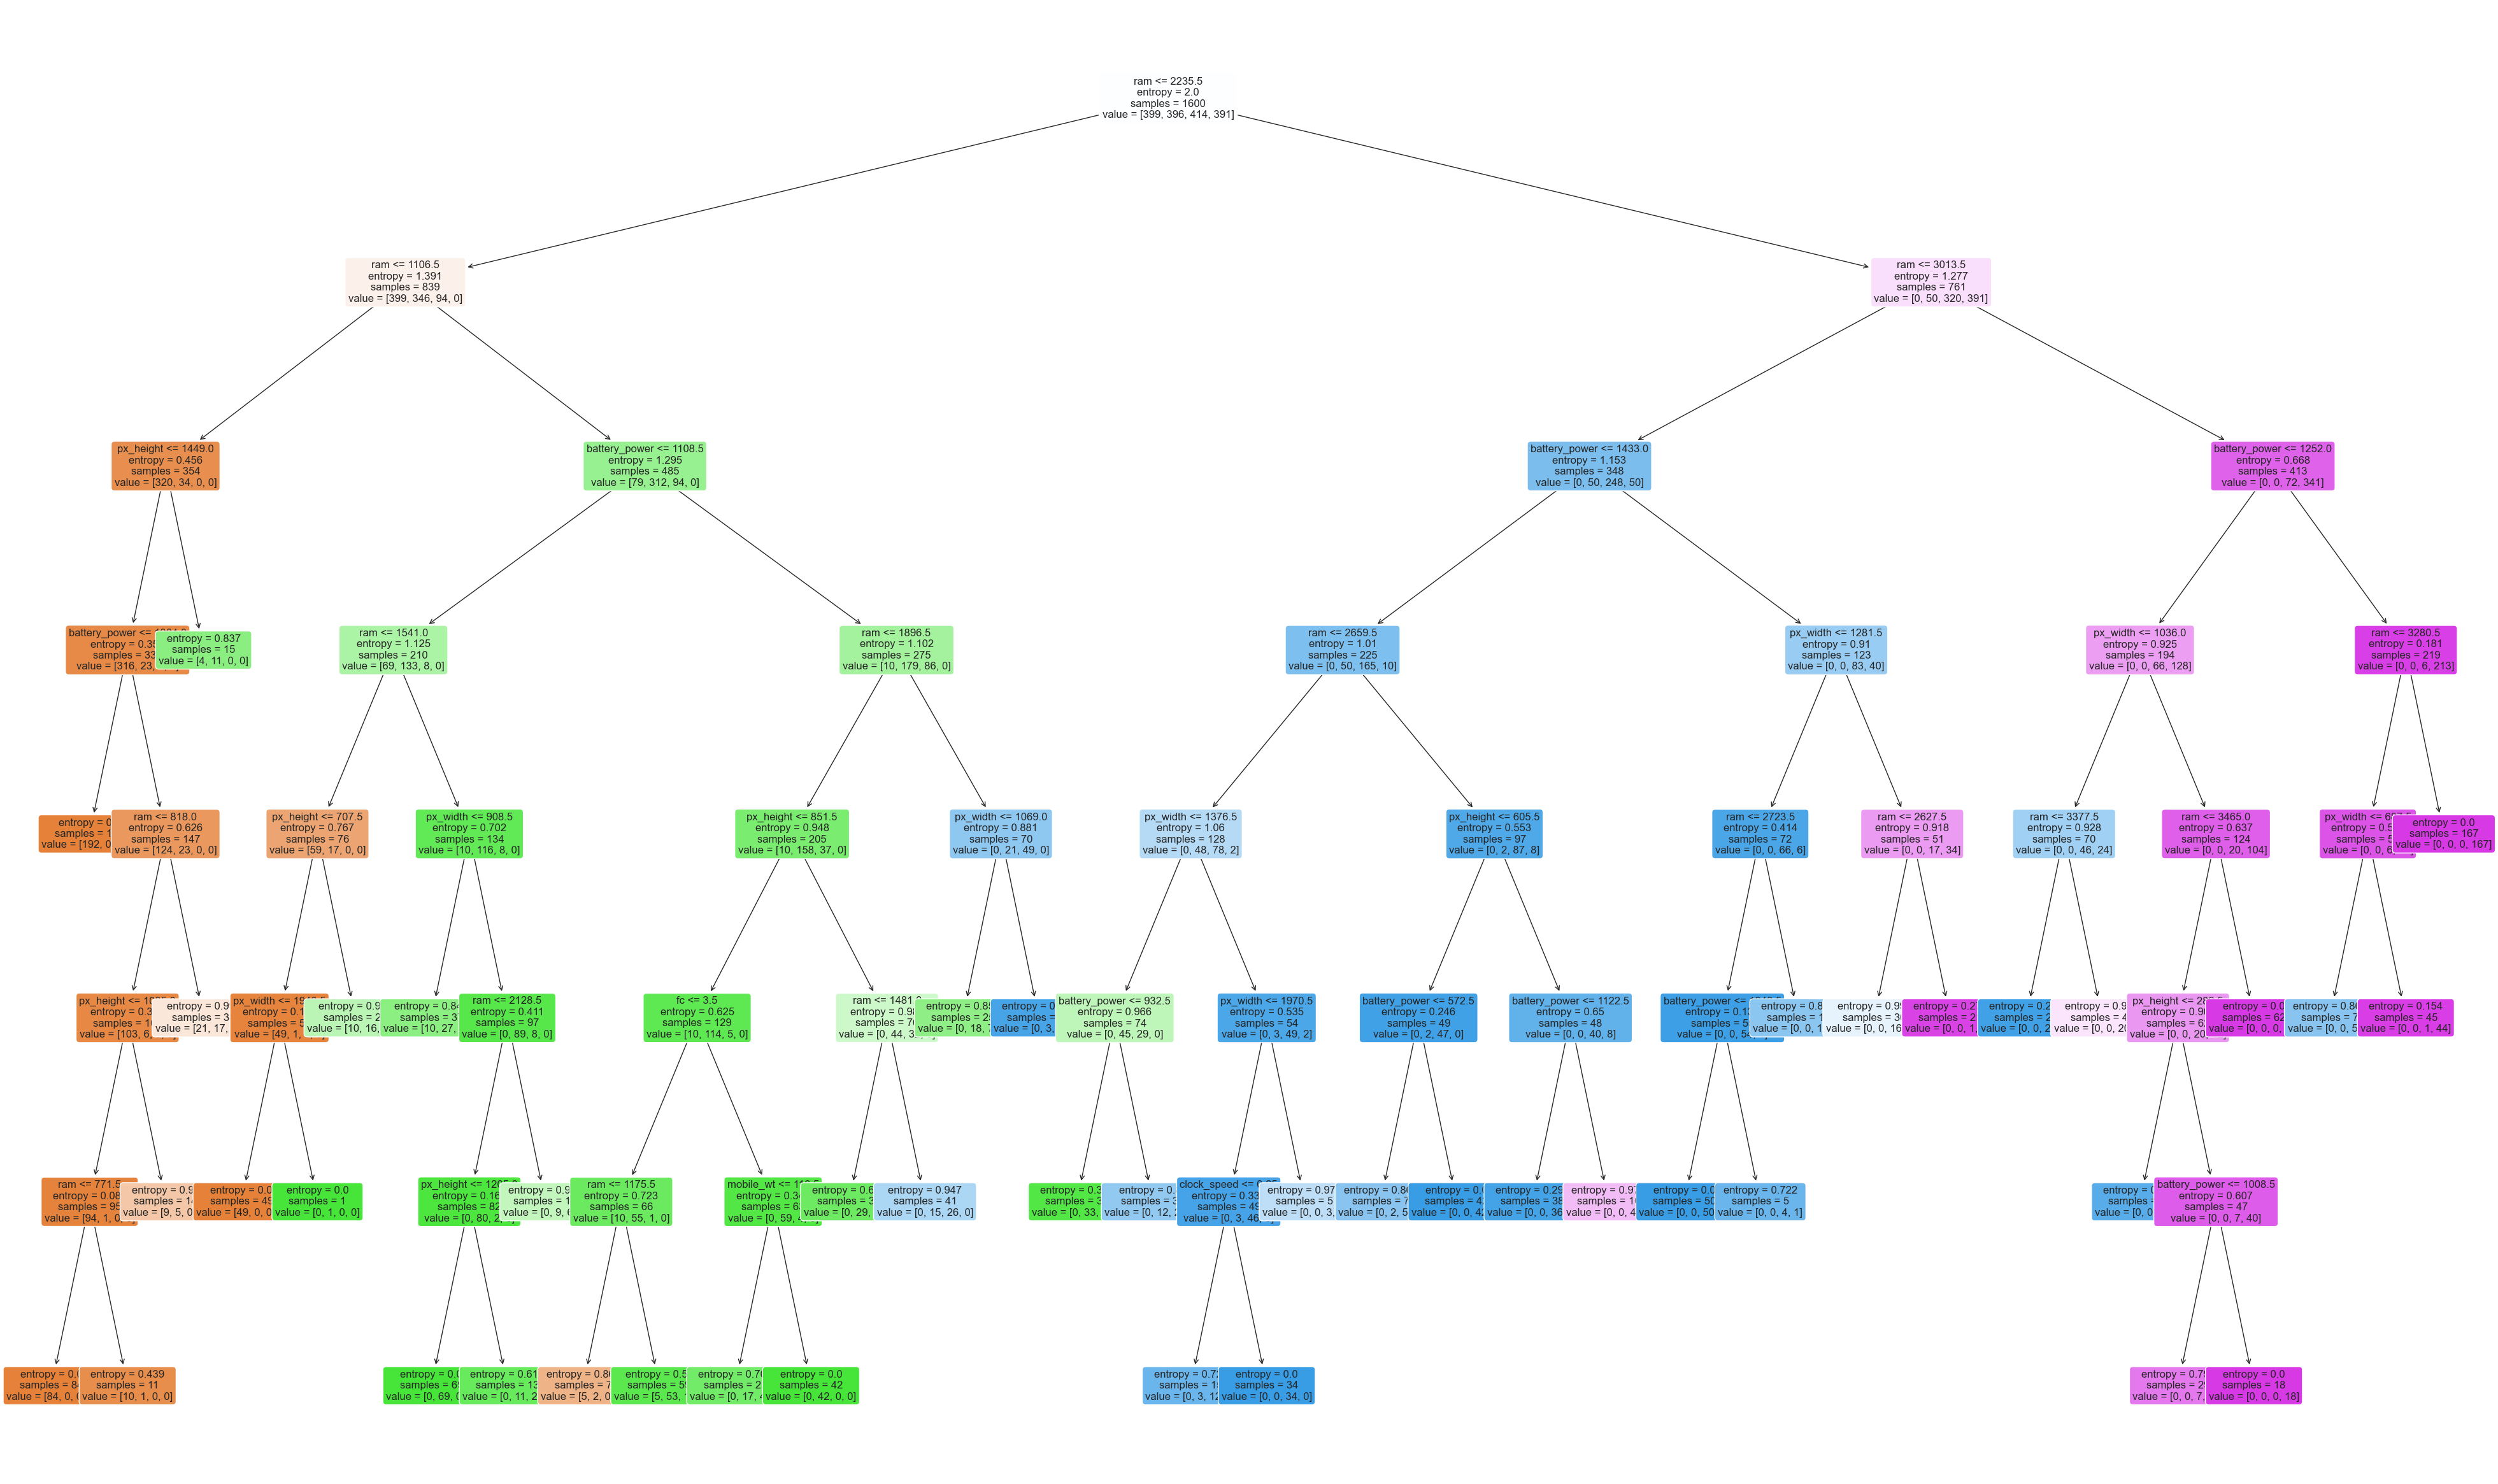

In [44]:
from sklearn import tree
import matplotlib.pyplot as plt


best_estimator = grid.best_estimator_

plt.figure(figsize=(50, 30))
tree.plot_tree(best_estimator, 
               filled=True, rounded=True, 
               feature_names = list(rf_train_x),
               fontsize=12)
plt.show()

#### RANDOM FOREST

In [45]:
from sklearn.model_selection import train_test_split

rf_train , rf_test = train_test_split(rf , test_size = .2 , random_state= 2911)

rf_train_x = rf_train.iloc[: , 0:-1]
rf_train_y = rf_train.iloc[: , -1]

rf_test_x = rf_test.iloc[: , 0:-1]
rf_test_y = rf_test.iloc[: , -1]

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(rf_train_x , rf_train_y)

RandomForestClassifier(n_estimators=50)

In [47]:
pred_rfc = rfc.predict(rf_test_x)


In [48]:
tab_rfc = confusion_matrix(rf_test_y , pred_rfc)
tab_rfc

array([[96,  5,  0,  0],
       [17, 75, 12,  0],
       [ 0,  5, 76,  5],
       [ 0,  0, 16, 93]], dtype=int64)

In [49]:
tab_rfc = pd.DataFrame(tab_rfc)
tab_rfc

,0,1,2,3
0,96,5,0,0
1,17,75,12,0
2,0,5,76,5
3,0,0,16,93


In [50]:
print(classification_report(rf_test_y , pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       101
           1       0.88      0.72      0.79       104
           2       0.73      0.88      0.80        86
           3       0.95      0.85      0.90       109

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



#### NAIVE BAYES

In [51]:
from sklearn.model_selection import train_test_split

rf_train , rf_test = train_test_split(rf , test_size = .2 , random_state= 2911)

rf_train_x = rf_train.iloc[: , 0:-1]
rf_train_y = rf_train.iloc[: , -1]

rf_test_x = rf_test.iloc[: , 0:-1]
rf_test_y = rf_test.iloc[: , -1]

In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
nb = MultinomialNB()
nb.fit(rf_train_x , rf_train_y)
nb_pred = nb.predict(rf_test_x)

In [54]:
from sklearn.metrics import *

In [55]:
tab_rfc = confusion_matrix(rf_test_y , nb_pred)
tab_rfc

array([[76, 23,  1,  1],
       [38, 36, 19, 11],
       [ 2, 22, 22, 40],
       [ 0, 11, 30, 68]], dtype=int64)

In [56]:
tab_rfc = pd.DataFrame(tab_rfc)
tab_rfc

,0,1,2,3
0,76,23,1,1
1,38,36,19,11
2,2,22,22,40
3,0,11,30,68


In [57]:
print(classification_report(rf_test_y , nb_pred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       101
           1       0.39      0.35      0.37       104
           2       0.31      0.26      0.28        86
           3       0.57      0.62      0.59       109

    accuracy                           0.51       400
   macro avg       0.48      0.49      0.49       400
weighted avg       0.49      0.51      0.49       400



## CONCLUSION

Many models were built like Logistic Regression , Decision Tree , Random Forest , Naive Bayes and out of every model , Descision Tree has given the best result with 87% accuracy.